In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=2
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me break down the given Hamiltonian and extract the necessary information to implement the HartreeFockHamiltonian class.

First, let's understand the Hamiltonian:

We have a non-interacting part `H_0` and two interacting parts: `H_Hartree` and `H_Fock`. We need to identify the flavors, analyze both non-interacting and interacting terms, and implement the class accordingly.

**QUESTION 1: Dimension and Basis Order**

From the Hamiltonian, I need to identify the flavors (dimensions) and their order. Looking at the operators in the Hamiltonian:

In `H_0`:
- `c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}` - We have spin `s` and momenta `p` and `q`.

In `H_Hartree` and `H_Fock`:
- We have spin indices `s` and `s'` and momenta `p` and `q`.

The q vectors are specifically mentioned to be the three high-symmetry points of the folded Brillouin zone: Gamma point, K point, and K' point. Therefore, `q` is a discrete index with 3 possible values.


In [7]:
print(generated_code['thinking'])

Let me break down the given Hamiltonian and extract the necessary information to implement the HartreeFockHamiltonian class.

First, let's understand the Hamiltonian:

We have a non-interacting part `H_0` and two interacting parts: `H_Hartree` and `H_Fock`. We need to identify the flavors, analyze both non-interacting and interacting terms, and implement the class accordingly.

**QUESTION 1: Dimension and Basis Order**

From the Hamiltonian, I need to identify the flavors (dimensions) and their order. Looking at the operators in the Hamiltonian:

In `H_0`:
- `c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}` - We have spin `s` and momenta `p` and `q`.

In `H_Hartree` and `H_Fock`:
- We have spin indices `s` and `s'` and momenta `p` and `q`.

The q vectors are specifically mentioned to be the three high-symmetry points of the folded Brillouin zone: Gamma point, K point, and K' point. Therefore, `q` is a discrete index with 3 possible values.

The p vectors are defined within the folded Brilloui

In [8]:
print(generated_code['text'])

# Question 1: Dimension and Basis Order

Looking at the Hamiltonian, I can identify two flavors in this system:
- Spin (s): with two possible values (up, down)
- Reciprocal lattice vector (q): with three values (Γ, K, K')

Therefore:
Tuple of Flavors (D) = (2, 3)

Basis Order:
0: spin. Order: spin_up, spin_down
1: reciprocal lattice vector. Order: Gamma, K, K'

# Question 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- Hartree term: `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle` - expectation value for same spin, different q-vectors
- Fock term: `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha) \rangle` - expectation value for potentially different spins and q-vectors

TERMS:
- H_0: `-\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}` -> H[s, q, s, q', k], Non-interacting (NI)
- H_Hartree: `\frac{1}{\m

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice system with spin and
    reciprocal lattice vector (q) degrees of freedom.
    
    Args:
        N_shell (int): Number of momentum shells in the Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor for the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'  # Lattice symmetry
        self.D = (2, 3)  # Number of flavors: (spin, q-vector)
        self.basis_order = {'0': 'spin', '1': 'q_vector'}
        # Order for each flavor:
        # 0: spin up, spin down
        # 1: Gamma point, K point, K' point
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_2.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

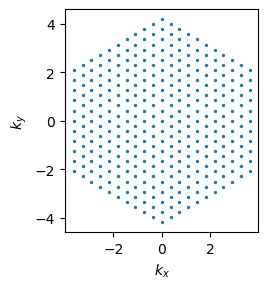

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

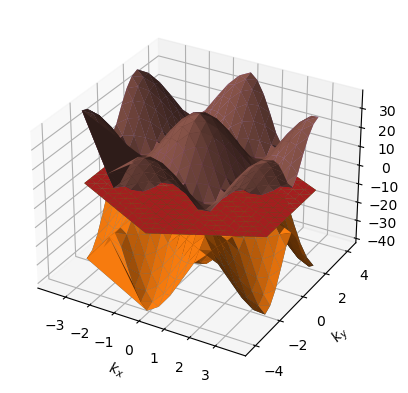

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

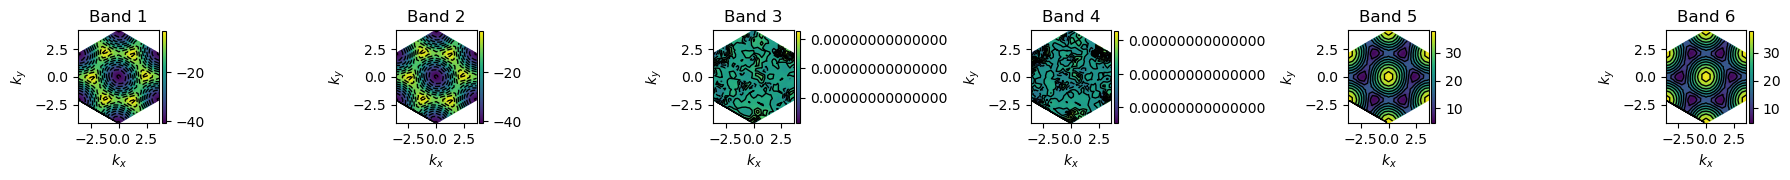

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 3


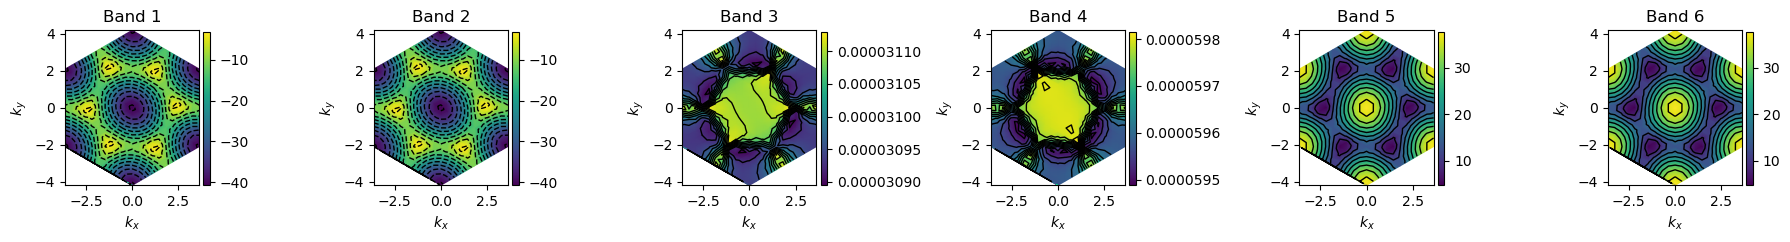

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


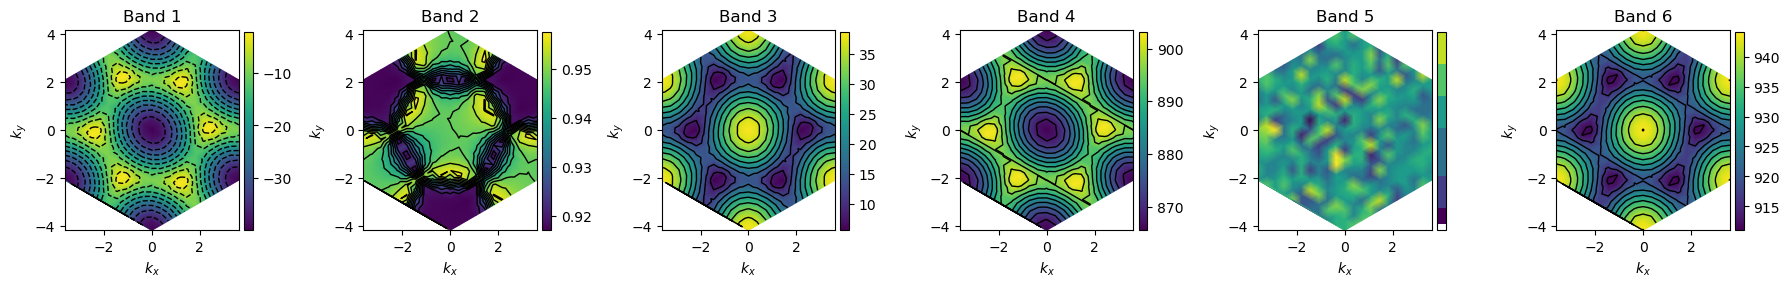

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 4.61
U/T is 11.86
mean_U is 75.85


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to examine the image and determine whether it correctly represents the momentum space mesh in the first Brillouin zone for the given problem, with a focus on checking the point group symmetry.

Looking at the image:
- It shows a hexagonal arrangement of points in momentum space (k-space)
- The axes are labeled as kx and ky
- The hexagonal shape extends approximately from -4 to 4 in the ky direction and from -3 to 3 in the kx direction
- The points form a regular grid within this hexagonal boundary

To evaluate this according to the rubric:

1. First, does this show a momentum space mesh in the first Brillouin zone?
   - Yes, the image does show a momentum space mesh arranged in a hexagonal pattern, which is consistent with the first Brillouin zone of a triangular lattice.

2. Check the point group symmetry:
   - The problem specifies a triangular lattice, which should have a hexagonal Brillouin zone with 6-fold rotational symm

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots shown in the image to evaluate their correctness according to the given rubric.

1. Identify the shape of the Brillouin zone boundary:
   Looking at the plots, I can see hexagonal boundaries in all six band structure plots. This is consistent with the Brillouin zone of a triangular lattice, which is hexagonal. So this aspect appears correct.

2. Examine the symmetry of the energy distribution:

   2.1 Highest energy regions (yellow):
   - In Bands 1 and 2, the highest energy regions (yellow/light colors) appear to be distributed around the corners of the hexagonal Brillouin zone.
   - In Bands 5 and 6, the highest energy regions are concentrated in the center with concentric patterns.
   - Bands 3 and 4 have a different color scale and pattern.

   2.2 Pattern of energy variation:
   - Bands 1 and 2 show similar patterns with energy decreasing from the corners toward the center with hexagonal s

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

I need to analyze the band structure images according to the rubric provided. Let me systematically go through each point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the images, I can see that each plot shows a hexagonal boundary, which is indeed the expected shape for the Brillouin zone of a triangular lattice in reciprocal space. The hexagonal shape is clearly visible in all 6 band plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In bands 1 and 2, the highest energy regions (yellow) appear to be at specific points around the perimeter of the hexagon.
In bands 3 and 4, the yellow regions are in the center.
In bands 5 and 6, the highest energy regions are both in the center and in symmetric patterns around it.

2.2 Trace the pattern of energy v

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

Let me analyze the band structure plots shown in the image according to the given rubric.

1. **Shape of the Brillouin zone boundary**:
   The Brillouin zone in each plot appears to be hexagonal, which is indeed what we expect for a triangular lattice. This matches what's expected.

2. **Symmetry of the energy distribution**:
   Let's examine each band:
   
   - Band 1: Shows a hexagonal symmetry pattern with high energy regions (yellow) at the corners and some points between corners. The pattern has 6-fold rotational symmetry and mirror symmetries along multiple axes.
   
   - Band 2: Shows a hexagonal pattern with high energy regions (light green) forming a star-like pattern. It appears to have 6-fold rotational symmetry.
   
   - Band 3: Shows concentric patterns with high energy (yellow) at the center and some regions near the edges. It has roughly 6-fold symmetry.
   
   - Band 4: Shows a pattern similar to Band 1 with high ener

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '2' saved to final_answer.yaml
